In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [2]:

# Membaca data dan label dari folder
def load_data(data_dir):
    images = []
    labels = []
    class_names = os.listdir(data_dir)
    for i, class_name in enumerate(class_names):
        class_dir = os.path.join(data_dir, class_name)
        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            image = cv2.imread(img_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Konversi ke skala abu-abu
            image = cv2.resize(image, (48, 48))  # Ubah ukuran gambar menjadi 48x48 piksel
            images.append(image)
            labels.append(i)
    images = np.array(images, dtype=np.float32)
    labels = np.array(labels, dtype=np.int32)
    return images, labels, class_names


In [3]:
# Memisahkan data menjadi set pelatihan dan set pengujian
def split_data(images, labels, test_ratio=0.2):
    num_samples = len(images)
    indices = np.random.permutation(num_samples)
    test_size = int(num_samples * test_ratio)
    test_indices = indices[:test_size]
    train_indices = indices[test_size:]
    train_images, train_labels = images[train_indices], labels[train_indices]
    test_images, test_labels = images[test_indices], labels[test_indices]
    return train_images, train_labels, test_images, test_labels


In [4]:
# Pra-pemrosesan data
def preprocess_data(images, labels):
    images = images / 255.0  # Normalisasi intensitas piksel
    images = np.expand_dims(images, axis=-1)  # Menambahkan dimensi saluran (channel)
    unique_labels = np.unique(labels)
    label_mapping = {label: i for i, label in enumerate(unique_labels)}
    labels = np.array([label_mapping[label] for label in labels])
    labels = tf.keras.utils.to_categorical(labels)  # One-hot encoding label
    return images, labels


In [5]:

# Membangun model CNN
def build_model(input_shape, num_classes):
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    return model


In [6]:

# Memuat dan memproses data
data_dir = '/kaggle/input/face-expression'  # Ganti dengan path direktori dataset Anda
images, labels, class_names = load_data(data_dir)
train_images, train_labels, test_images, test_labels = split_data(images, labels)
train_images, train_labels = preprocess_data(train_images, train_labels)
test_images, test_labels = preprocess_data(test_images, test_labels)


In [7]:
# Membangun model
input_shape = train_images[0].shape
num_classes = len(np.unique(labels))
model = build_model(input_shape, num_classes)


In [8]:
# Mengompilasi dan melatih model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=30, batch_size=32, validation_data=(test_images, test_labels))


Epoch 1/30
7/7 [==============================] - 2s 112ms/step - loss: 1.1154 - accuracy: 0.3881 - val_loss: 1.1018 - val_accuracy: 0.3200
Epoch 2/30
7/7 [==============================] - 0s 64ms/step - loss: 1.0960 - accuracy: 0.3383 - val_loss: 1.1038 - val_accuracy: 0.3000
Epoch 3/30
7/7 [==============================] - 0s 62ms/step - loss: 1.0899 - accuracy: 0.3881 - val_loss: 1.1124 - val_accuracy: 0.3000
Epoch 4/30
7/7 [==============================] - 0s 59ms/step - loss: 1.0926 - accuracy: 0.3881 - val_loss: 1.1175 - val_accuracy: 0.3000
Epoch 5/30
7/7 [==============================] - 0s 63ms/step - loss: 1.0746 - accuracy: 0.3930 - val_loss: 1.0938 - val_accuracy: 0.4000
Epoch 6/30
7/7 [==============================] - 0s 68ms/step - loss: 1.0636 - accuracy: 0.4627 - val_loss: 1.1142 - val_accuracy: 0.3000
Epoch 7/30
7/7 [==============================] - 0s 68ms/step - loss: 1.0417 - accuracy: 0.5025 - val_loss: 1.0874 - val_accuracy: 0.4800
Epoch 8/30
7/7 [==========

In [9]:
# Evaluasi model
loss, accuracy = model.evaluate(test_images, test_labels)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

2/2 [==============================] - 0s 14ms/step - loss: 1.0609 - accuracy: 0.6400
Test Loss: 1.0608928203582764
Test Accuracy: 0.6399999856948853


1/1 [==============================] - 0s 129ms/step


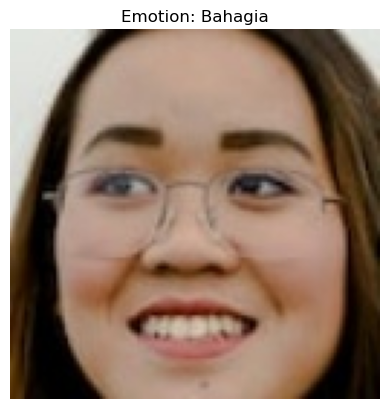

In [10]:
import cv2
import numpy as np
import tensorflow as tf

# Pra-pemrosesan gambar
def preprocess_image(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Konversi ke skala abu-abu
    image = cv2.resize(image, (48, 48))  # Ubah ukuran gambar menjadi 48x48 piksel
    image = image.astype(np.float32) / 255.0  # Normalisasi intensitas piksel
    image = np.expand_dims(image, axis=-1)  # Menambahkan dimensi saluran (channel)
    return image

# Fungsi untuk memprediksi ekspresi wajah dari path gambar
def predict_emotion(image_path, model):
    image = cv2.imread(image_path)
    preprocessed_image = preprocess_image(image)
    preprocessed_image = np.expand_dims(preprocessed_image, axis=0)
    predictions = model.predict(preprocessed_image)
    predicted_label = np.argmax(predictions[0])
    return predicted_label

# Memuat model yang telah dilatih sebelumnya

# Memanggil fungsi predict_emotion dengan path gambar sebagai parameter
    print(predicted_label)
image_path = '/kaggle/input/face-expression/Bahagia/0.jpg'  # Ganti dengan path gambar yang ingin diprediksi
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Konversi warna gambar ke RGB
plt.imshow(image)
plt.axis('off')

# predict
predicted_label = predict_emotion(image_path, model)

plt.title(f'Emotion: {class_names[predicted_label]}')
plt.show()
